In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_features.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_classes.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_bitcoin_dataset/elliptic_txs_features.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_bitcoin_dataset/elliptic_txs_classes.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv


In [19]:
import pandas as pd

# Load the dataset
edges = pd.read_csv('/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')
classes = pd.read_csv('/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
features = pd.read_csv('/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)

# Display the first few rows of each DataFrame
print("Edges:")
edges.head()



Edges:


,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [20]:
print("\nClasses:")
classes.head()


Classes:


,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [21]:
print("\nFeatures:")
features.head()


Features:


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [18]:
# Check the basic statistics and data types
print("\nEdges Info:")
edges.info()
edges.describe()

print("\nClasses Info:")
classes.info()
classes.describe()

print("\nFeatures Info:")
features.info()
features.describe()

# Check the distribution of classes
class_distribution = classes['class'].value_counts()
print("\nClass Distribution:")
print(class_distribution)



Edges Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234355 entries, 0 to 234354
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   txId1   234355 non-null  int64
 1   txId2   234355 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB

Classes Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   txId    203769 non-null  int64 
 1   class   203769 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB

Features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 167 entries, 0 to 166
dtypes: float64(165), int64(2)
memory usage: 259.6 MB

Class Distribution:
class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64


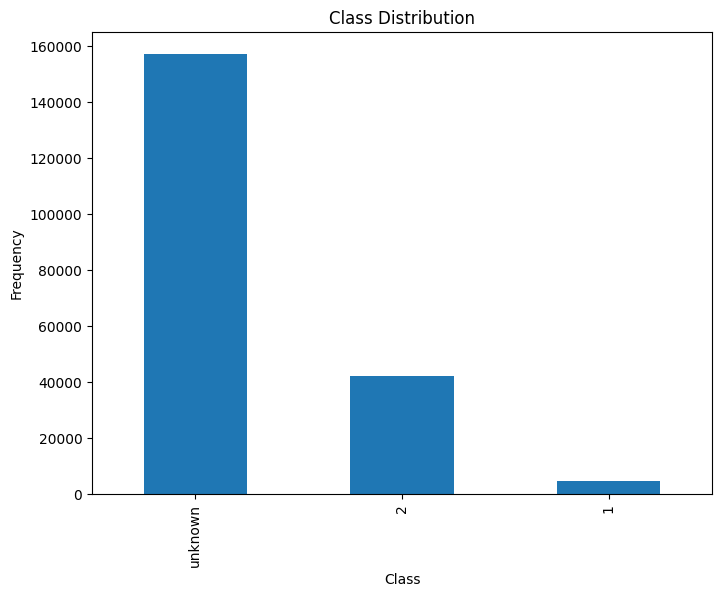

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Visualize the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# # Create a graph and visualize a subset of the transactions
# G = nx.from_pandas_edgelist(edges, source='txId1', target='txId2')

# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G, seed=42)  # positions for all nodes
# nx.draw(G, pos, node_size=10, edge_color='gray', alpha=0.5, with_labels=False)
# plt.title('Transaction Network (Subset)')
# plt.show()


In [5]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:0000:01


In [6]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder
# Get the maximum index in the edge list
max_index = max(edges['txId1'].max(), edges['txId2'].max())
num_nodes = features.shape[0]

print(f'Maximum index in edge list: {max_index}')
print(f'Number of nodes in features: {num_nodes}')

Maximum index in edge list: 403244581
Number of nodes in features: 203769


In [7]:
# Create a mapping from transaction IDs to feature indices
tx_id_to_index = {tx_id: idx for idx, tx_id in enumerate(features[0])}

# Filter and map edges
valid_edges = edges[edges['txId1'].isin(tx_id_to_index) & edges['txId2'].isin(tx_id_to_index)]
valid_edges['txId1'] = valid_edges['txId1'].map(tx_id_to_index)
valid_edges['txId2'] = valid_edges['txId2'].map(tx_id_to_index)

# Convert to PyTorch tensor
edge_index = torch.tensor(valid_edges.values.T, dtype=torch.long)

In [8]:
# Extract node features
node_features = torch.tensor(features.drop(columns=[0]).values, dtype=torch.float)

# Encode class labels
le = LabelEncoder()
class_labels = le.fit_transform(classes['class'])
node_labels = torch.tensor(class_labels, dtype=torch.long)


In [9]:
from torch_geometric.data import Data

# Create the data object
data = Data(x=node_features, edge_index=edge_index, y=node_labels)

# Create masks for training, validation, and testing
num_nodes = data.num_nodes
perm = torch.randperm(num_nodes)
train_size = int(0.8 * num_nodes)
val_size = int(0.1 * num_nodes)
test_size = num_nodes - train_size - val_size

data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.val_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

data.train_mask[perm[:train_size]] = True
data.val_mask[perm[train_size:train_size + val_size]] = True
data.test_mask[perm[train_size + val_size:]] = True


In [10]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = GCN(num_node_features=data.num_features, num_classes=len(le.classes_))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()


In [11]:
# Define the training function
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Define the evaluation function
def evaluate(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        accuracy = int(correct) / int(data.test_mask.sum())
    return accuracy


In [12]:
# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    loss = train(model, data, optimizer, criterion)
    if epoch % 10 == 0:
        val_acc = evaluate(model, data)
        print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Validation Accuracy: {val_acc:.4f}')

# Evaluate on the test set
test_accuracy = evaluate(model, data)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 000, Loss: 2.5478, Validation Accuracy: 0.1439
Epoch 010, Loss: 0.6355, Validation Accuracy: 0.7982
Epoch 020, Loss: 0.5838, Validation Accuracy: 0.8122
Epoch 030, Loss: 0.5342, Validation Accuracy: 0.8183
Epoch 040, Loss: 0.4984, Validation Accuracy: 0.8241
Epoch 050, Loss: 0.4787, Validation Accuracy: 0.8299
Epoch 060, Loss: 0.4671, Validation Accuracy: 0.8322
Epoch 070, Loss: 0.4588, Validation Accuracy: 0.8344
Epoch 080, Loss: 0.4513, Validation Accuracy: 0.8365
Epoch 090, Loss: 0.4443, Validation Accuracy: 0.8384
Epoch 100, Loss: 0.4377, Validation Accuracy: 0.8410
Epoch 110, Loss: 0.4317, Validation Accuracy: 0.8432
Epoch 120, Loss: 0.4266, Validation Accuracy: 0.8443
Epoch 130, Loss: 0.4220, Validation Accuracy: 0.8452
Epoch 140, Loss: 0.4180, Validation Accuracy: 0.8459
Epoch 150, Loss: 0.4145, Validation Accuracy: 0.8464
Epoch 160, Loss: 0.4113, Validation Accuracy: 0.8472
Epoch 170, Loss: 0.4083, Validation Accuracy: 0.8477
Epoch 180, Loss: 0.4057, Validation Accuracy: 

In [13]:
# Define the prediction function
def predict(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
    return pred


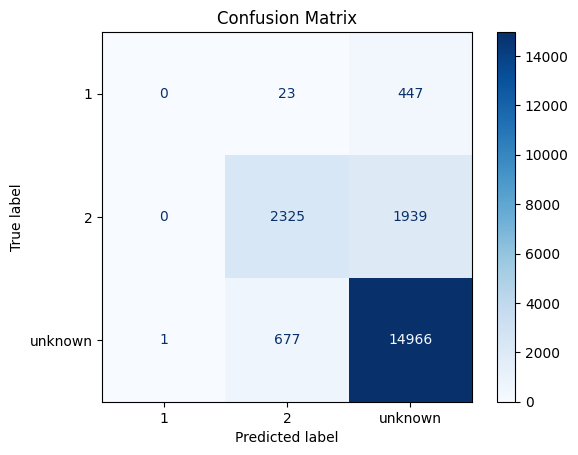

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
test_pred = predict(model, data)[data.test_mask]

# Generate the confusion matrix
cm = confusion_matrix(data.y[data.test_mask].cpu(), test_pred.cpu())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
